In [40]:
'''An implementation of Stein Variational Gradient Descent on the Banana Distribution. '''

'An implementation of Stein Variational Gradient Descent on the Banana Distribution. '

In [41]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [42]:
b = 5
sigma = 1
def log_P(X:jnp.array):
    return (-(X[...,0]**2 + (X[...,1]- b * (X[...,0]**2 - sigma**2)))**2)/2


In [43]:
gamma = 5.
def RBF_Kernel(x,x_prime,gamma): 
    sq_dist = jnp.sum((x-x_prime)**2)
    return jnp.exp(-gamma * sq_dist)

In [44]:
grad_logp = jax.vmap(jax.grad(log_P),in_axes = (0,))
grad_kernel = jax.vmap(jax.grad(RBF_Kernel,argnums = (0,)),in_axes = (0,None,None))
vmap_kernel = jax.vmap(RBF_Kernel,in_axes = (0,None,None))
def optim_map(x,particles): 
    return jnp.mean(vmap_kernel(particles,x,gamma)[:,jnp.newaxis] * grad_logp(particles) + grad_kernel(particles,x,gamma)[0],axis = 0)


In [45]:
def update(particle,particles,step_size): 
    return particle + step_size * optim_map(particle,particles)

vmap_update = jax.jit(jax.vmap(update,in_axes = (0,None,None)))

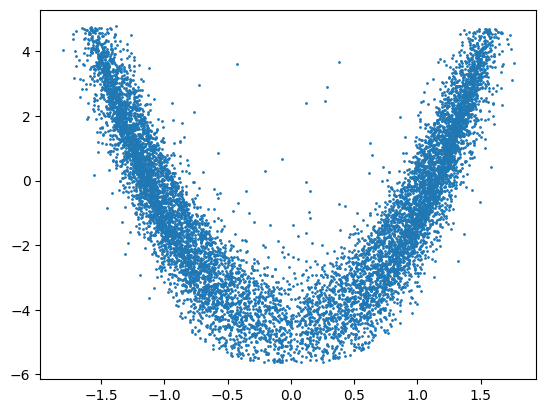

In [46]:
num_iterations = 10000
N = 10000
step_size = 0.01
rng_key = jax.random.key(0)
init_key,rng_key = jax.random.split(rng_key)

particles = jax.random.multivariate_normal(init_key, jnp.array([0,0]),1 * jnp.eye(2),shape = (N,))

for iter in range(num_iterations): 
    particles_copy = particles.copy()
    particles = vmap_update(particles,particles_copy,step_size)

plt.scatter(particles[:,0],particles[:,1],s=1.)
